# Project Title:Credit scoring and customer segmentation


In [ ]:
#Credit: Credit is the ability to borrow money or access goods/services with the agreement to pay later.
#Credit: Borrowing money to repay later
#Credit Utilization Ratio measures how much of your available credit you are currently using, Below 30% is considered good.
#Credit Accounts: This refers to the total number of active credit lines or loans a person has.
#Number of Credit Accounts:	Count of all current loans/credit cards
#Credit Utilization of the credit limit being used
#Available credit is the amount you still have left to use on your credit account(s).
#Available Credit = Total Credit Limit – Current Credit Balance
#Credit Utilization Ratio = Used Credit / Total Credit Limit
#High Credit Utilization Ratio → Lower Credit Score,Low Credit Utilization Ratio → Higher Credit Score
# Credit Utilization Ratio is a key feature that affects credit Scores.
# Keep utilization below 30% to maintain or improve your credit score.
# It’s one of the most influential factors in credit scoring models 
#Payment History: Sum or index representing payment behavior (on-time/late/missed).
#Interest Rate:	Rate of interest on loans.The higher the rate of interest higher the risk.Higher interest may be offered to riskier customers. Affects affordability. 

# Data Preprocessing

# 1. Import libraries & Load the dataset

In [5]:
import pandas as pd
import numpy as np
from sklearn. preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
# load the dataset
file_path ="D:\\MachineLearning\\Credit Scoring and Segmentation.csv"
df=pd.read_csv(file_path)
df.head()


,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [ ]:
#Observation: The dataset contains 1000 credit-related samples 

# 2.Exploratory Data Analysis (EDA) 

In [31]:
#Handling Null Values
df.isnull().sum()


Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64

In [ ]:
# Observation: There are 0 null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
#Observation:Data set have 3 float ,4 int and 5 object type features

In [32]:
df.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


In [8]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Education Level',
       'Employment Status', 'Credit Utilization Ratio', 'Payment History',
       'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
       'Loan Term', 'Type of Loan'],
      dtype='object')

In [9]:
#creating a new feature
columns =['Gender', 'Marital Status', 'Education Level','Employment Status']
encoder = LabelEncoder()
for col in columns:
    df[col]=encoder.fit_transform(df[col])

df

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,1,1,2,0,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,1,1,1,2,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,0,2,2,0,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,0,1,3,2,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,1,1,0,1,0.99,828.0,2,3289000,6.28,36,Personal Loan
...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,1,0,1,0,0.74,1285.0,8,3530000,12.99,48,Auto Loan
996,64,1,0,0,2,0.77,1857.0,2,1377000,18.02,60,Home Loan
997,63,0,2,2,1,0.18,2628.0,10,2443000,18.95,12,Personal Loan
998,51,0,1,3,1,0.32,1142.0,3,1301000,1.80,24,Auto Loan


In [11]:
#creating the target feature ---Credit Score

def determine_creditscore(row):
    if row['Credit Utilization Ratio']<=0.3:
        return 'Good'
    elif row['Credit Utilization Ratio']>=0.3 and row['Credit Utilization Ratio']<=0.5:
        return 'Fair'
    else:
        return 'Poor'

df['Credit_Score']=df.apply(determine_creditscore,axis=1)
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit_Score
0,60,1,1,2,0,0.22,2685.0,2,4675000,2.65,48,Personal Loan,Good
1,25,1,1,1,2,0.20,2371.0,9,3619000,5.19,60,Auto Loan,Good
2,30,0,2,2,0,0.22,2771.0,6,957000,2.76,12,Auto Loan,Good
3,58,0,1,3,2,0.12,1371.0,2,4731000,6.57,60,Auto Loan,Good
4,32,1,1,0,1,0.99,828.0,2,3289000,6.28,36,Personal Loan,Poor


In [13]:
le=LabelEncoder()
df['Credit_Score']=le.fit_transform(df['Credit_Score'])
df['Type of Loan']=le.fit_transform(df['Type of Loan'])
df.head()

#0-Good,1-Fair,2-Poor

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit_Score
0,60,1,1,2,0,0.22,2685.0,2,4675000,2.65,48,2,1
1,25,1,1,1,2,0.20,2371.0,9,3619000,5.19,60,0,1
2,30,0,2,2,0,0.22,2771.0,6,957000,2.76,12,0,1
3,58,0,1,3,2,0.12,1371.0,2,4731000,6.57,60,0,1
4,32,1,1,0,1,0.99,828.0,2,3289000,6.28,36,2,2


In [14]:
df['Credit_Score'].value_counts()

Credit_Score
2    514
1    295
0    191
Name: count, dtype: int64

In [37]:
#Observation: So There are 295 persons with good credit score,191 with fair credit score and 514 with poor credit score


In [24]:
import numpy as np
Q1,Q3=np.percentile(df['Credit Utilization Ratio'],(25,75))
IQR=Q3-Q1
IQR

0.5

In [25]:
LowerBound=Q1-1.5*IQR
UpperBound=Q3+1.5*IQR
print(f'LowerBound Value:{LowerBound}')
print(f'UpperBound Value:{UpperBound}')

LowerBound Value:-0.5
UpperBound Value:1.5


In [26]:
#filtering the outliers
Outliers=df[(df['Credit Utilization Ratio'] < LowerBound) | (df['Credit Utilization Ratio']> UpperBound)]
print(f'The outliers are:{Outliers}')

The outliers are:Empty DataFrame
Columns: [Age, Gender, Marital Status, Education Level, Employment Status, Credit Utilization Ratio, Payment History, Number of Credit Accounts, Loan Amount, Interest Rate, Loan Term, Type of Loan, Credit_Score]
Index: []


In [ ]:
#Observation:There are no outliers

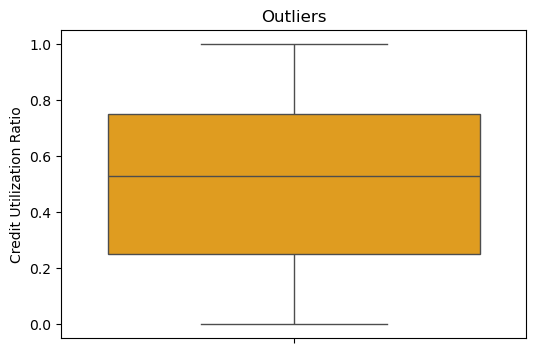

In [27]:
#Box Plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.boxplot(data=df['Credit Utilization Ratio'],color='orange')
plt.title("Outliers")
plt.show()

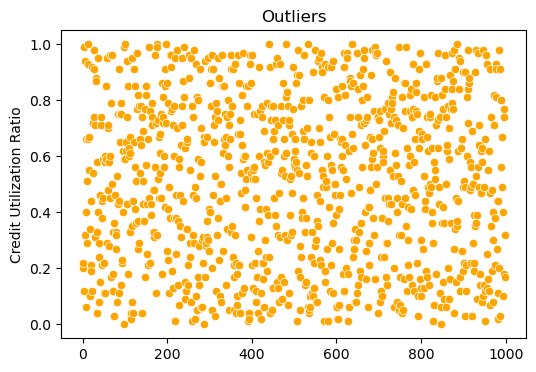

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.scatterplot(data=df['Credit Utilization Ratio'],color='orange')
plt.title("Outliers")
plt.show()

In [15]:
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit_Score
0,60,1,1,2,0,0.22,2685.0,2,4675000,2.65,48,2,1
1,25,1,1,1,2,0.20,2371.0,9,3619000,5.19,60,0,1
2,30,0,2,2,0,0.22,2771.0,6,957000,2.76,12,0,1
3,58,0,1,3,2,0.12,1371.0,2,4731000,6.57,60,0,1
4,32,1,1,0,1,0.99,828.0,2,3289000,6.28,36,2,2


# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Credit_Score', axis=1)   # Input features
y = df['Credit_Score']                # Target variable

# Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)    # Scaled features


# Train a Classification Model for Credit Scoring

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

# Predict the model

In [30]:
y_pred=model.predict(X_test)
y_pred

array([2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2, 2, 2, 0, 0,
       2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 2,
       1, 0, 2, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 0,
       1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 2, 1,
       0, 0, 0, 2, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 1], dtype=int64)

In [34]:
# Convert predictions to readable labels
credit_risk_labels = ['Good' if x == 0 else 'fair' if x==1 else 'poor' for x in y_pred]
credit_risk_labels

['poor',
 'fair',
 'poor',
 'poor',
 'fair',
 'Good',
 'poor',
 'fair',
 'fair',
 'poor',
 'poor',
 'Good',
 'poor',
 'poor',
 'poor',
 'poor',
 'poor',
 'Good',
 'poor',
 'Good',
 'fair',
 'poor',
 'poor',
 'poor',
 'poor',
 'poor',
 'poor',
 'poor',
 'poor',
 'poor',
 'poor',
 'poor',
 'poor',
 'poor',
 'fair',
 'poor',
 'Good',
 'fair',
 'fair',
 'poor',
 'fair',
 'Good',
 'fair',
 'Good',
 'Good',
 'poor',
 'fair',
 'fair',
 'poor',
 'poor',
 'fair',
 'fair',
 'poor',
 'poor',
 'fair',
 'Good',
 'poor',
 'fair',
 'Good',
 'poor',
 'fair',
 'fair',
 'fair',
 'poor',
 'poor',
 'fair',
 'poor',
 'poor',
 'poor',
 'Good',
 'poor',
 'Good',
 'poor',
 'poor',
 'fair',
 'fair',
 'poor',
 'fair',
 'fair',
 'fair',
 'Good',
 'Good',
 'fair',
 'poor',
 'poor',
 'poor',
 'Good',
 'Good',
 'poor',
 'Good',
 'fair',
 'poor',
 'Good',
 'fair',
 'poor',
 'poor',
 'poor',
 'poor',
 'poor',
 'poor',
 'fair',
 'poor',
 'Good',
 'fair',
 'poor',
 'fair',
 'fair',
 'poor',
 'Good',
 'poor',
 'fair',
 

# Evaluation

In [31]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# Confusion Matrix
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')



Model Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[ 41   0   0]
 [  0  59   0]
 [  0   0 100]]


In [ ]:
#Observation:Model Accuracy is 100%

# Customer Segmentation:Unsupervised Learning

In [ ]:
# Problem Description (Input and Output):
# Input: Customer-related data that can include features such as:
# Demographic features: Age, gender, income, etc.
# Behavioral features: Spending habits, purchasing patterns, frequency of visits to the website, etc.

# Output: The model outputs customer segments (groups) based on the similarities among customers. For example:
# Segment 0: High-income, low spending.
# Segment 1: Low-income, frequent shoppers.
# Segment 2: High spending, high engagement.

# Model Output:
# The model assigns a cluster label to each customer, indicating which segment they belong to.
# For example, after clustering, each customer will have a Cluster ID (1, 2, or 3) that corresponds to a particular group of similar customers.

In [ ]:
# Input: customer demographic and behavioral features
# Output: Cluster labels for customer segments

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [36]:
#Load the dataset 
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit_Score
0,60,1,1,2,0,0.22,2685.0,2,4675000,2.65,48,2,1
1,25,1,1,1,2,0.20,2371.0,9,3619000,5.19,60,0,1
2,30,0,2,2,0,0.22,2771.0,6,957000,2.76,12,0,1
3,58,0,1,3,2,0.12,1371.0,2,4731000,6.57,60,0,1
4,32,1,1,0,1,0.99,828.0,2,3289000,6.28,36,2,2


In [37]:
features = ['Age', 'Credit Utilization Ratio', 'Payment History',
            'Number of Credit Accounts', 'Loan Amount', 'Interest Rate', 'Loan Term']

X = df[features]

# Handle missing values if any
X = X.dropna()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method for finding no:of clusters

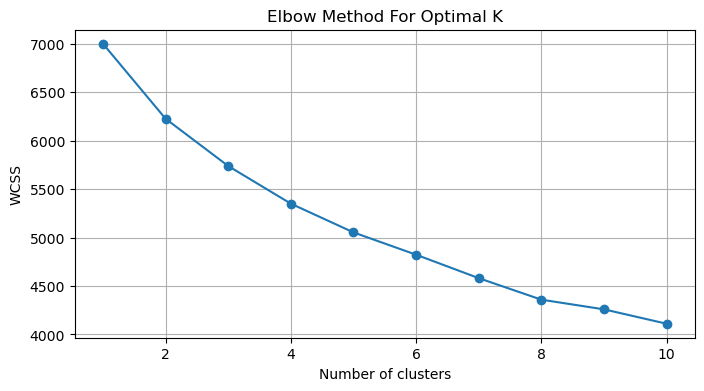

In [38]:
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
#Observation:we can conclude that there are 3 or 4 clusters

# K-Means Clustering

In [39]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Education Level',
       'Employment Status', 'Credit Utilization Ratio', 'Payment History',
       'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
       'Loan Term', 'Type of Loan', 'Credit_Score'],
      dtype='object')

In [44]:
# Choose optimal clusters, say K=3 based on elbow method
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
df['Customer_Segment'] = clusters
df.head()


,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit_Score,Customer_Segment
0,60,1,1,2,0,0.22,2685.0,2,4675000,2.65,48,2,1,0
1,25,1,1,1,2,0.20,2371.0,9,3619000,5.19,60,0,1,2
2,30,0,2,2,0,0.22,2771.0,6,957000,2.76,12,0,1,2
3,58,0,1,3,2,0.12,1371.0,2,4731000,6.57,60,0,1,0
4,32,1,1,0,1,0.99,828.0,2,3289000,6.28,36,2,2,0


#  Visualizing Clusters (using PCA)

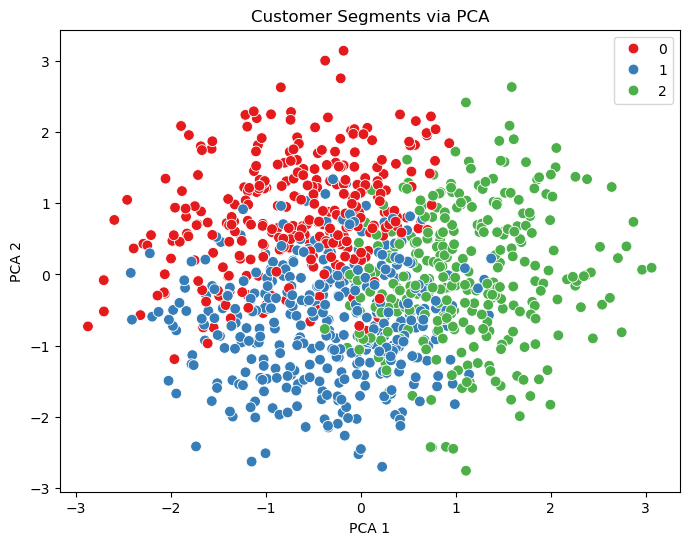

In [42]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1', s=60)
plt.title("Customer Segments via PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Analyze Cluster Characteristics

In [43]:
# Group by segment and get the mean of each feature
segment_summary = df.groupby('Customer_Segment')[features].mean()
print(segment_summary)

                        Age  Credit Utilization Ratio  Payment History  \
Customer_Segment                                                         
0                 49.048701                  0.534253      1247.168831   
1                 43.910053                  0.510582      1277.058201   
2                 35.022293                  0.485350      1866.108280   

                  Number of Credit Accounts   Loan Amount  Interest Rate  \
Customer_Segment                                                           
0                                  2.646104  2.780377e+06      12.318149   
1                                  8.113757  2.662815e+06      12.897196   
2                                  5.407643  1.937901e+06       6.425064   

                  Loan Term  
Customer_Segment             
0                 36.077922  
1                 40.476190  
2                 34.127389  


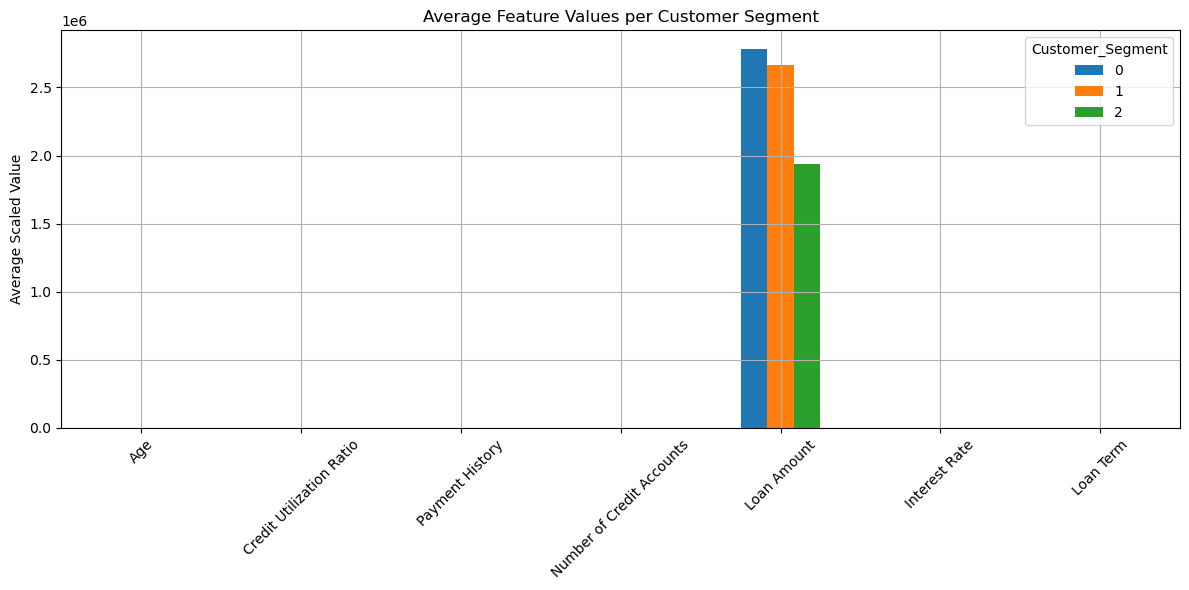

In [45]:
segment_summary.T.plot(kind='bar', figsize=(12, 6))
plt.title("Average Feature Values per Customer Segment")
plt.ylabel("Average Scaled Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
